In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

### Q1

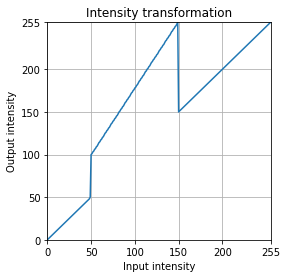

In [52]:
#create intensity tranformation piecewise
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(figsize = (4,4))
ax.plot(t)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_title("Intensity transformation")

ax.set_xlim(0,255)
ax.set_ylim(0,255)

ax.set_xticks((0,50,100,150,200,255))
ax.set_xticklabels((0,50,100,150,200,255))
ax.set_yticks((0,50,100,150,200,255))
ax.set_yticklabels((0,50,100,150,200,255))

ax.grid()
plt.show()

Text(0.5, 1.0, 'Intensity transformed image')

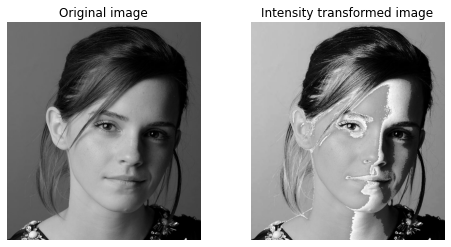

In [51]:
f = cv.imread('Images\emma_gray.jpg')
g = cv.LUT(f, t)

f_rgb = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2 , figsize=(8,4))
ax[0].imshow(f_rgb)
ax[0].axis('off')
ax[0].set_title("Original image")

ax[1].imshow(g_rgb)
ax[1].axis('off')
ax[1].set_title("Intensity transformed image")


### Q2
a)

In [59]:
t1 = np.linspace(0, 155, 156)
t2 = np.linspace(150, 255, 100)
t = np.concatenate((t1,t2)).astype(np.uint8)
assert len(t) == 256

In [60]:
# white matter
f = cv.imread('Images/brain_proton_density_slice.png')
assert f is not None

g = cv.LUT(f,t)

cv.imshow('Original Image', f)
cv.waitKey(0)

cv.imshow('Image', g)
cv.waitKey(0)

cv.destroyAllWindows()
